## Endru  
## Anu Kumaravelan 300316960

# Reference:
- https://towardsdatascience.com/fake-news-detection-with-machine-learning-using-python-3347d9899ad1
- https://www.youtube.com/watch?v=eLjs52-gsJQ
- https://towardsdatascience.com/i-trained-fake-news-detection-ai-with-95-accuracy-and-almost-went-crazy-d10589aa57c
- https://www.coursera.org/projects/nlp-fake-news-detector

### Installing necessary packages and Requirements

In [1]:
!pip install --upgrade tensorflow-gpu==2.7.0

# !pip install --upgrade nbformat
# !pip install --upgrade gensim
# !pip install nltk
# !pip install spacy # an OSS library for advanced NLP
# !pip install WordCloud

Requirement already up-to-date: tensorflow-gpu==2.7.0 in c:\users\kumar\anaconda3\lib\site-packages (2.7.0)


### Importing the necessary Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
import gensim
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.model_selection import train_test_split
from nltk import word_tokenize


In [4]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

In [5]:
# import nltk
# nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

### Importing the Datasets

In [6]:
#  reading the data from tru dataset and storing in dataframe true_df
true_df = pd.read_csv('True.csv')
true_df.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [7]:
#  reading the data from fake dataset and storing in dataframe fake_df
fake_df =pd.read_csv('Fake.csv')
fake_df.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


### EXPLORATORY DATA ANALYSIS

In [8]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [9]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


## Create a new column to make a note of original/ fakeness of the news

- we are going to join both the true and fake dataset
- before combining them together, we will add another column in both of the dataset as `isfake` to show which data is from where

In [10]:
true_df['isfake'] = 1
true_df.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [11]:
# similarly we will do for fake
fake_df['isfake'] = 0
fake_df.head()

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


- we will drop date column since it is not necessary 

In [12]:
true_df.drop(['date'],axis=1, inplace=True)
fake_df.drop(['date'],axis=1, inplace=True)

### We combine both the datasets

In [13]:
new_df = pd.concat([true_df,fake_df]).reset_index(drop=True)
new_df

,title,text,subject,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0


### Combining title and text together into a single column

In [14]:
new_df['news']= new_df['title']+': ' + new_df['text']
new_df.head()

,title,text,subject,isfake,news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...


### After Combining the title and text  into 'news'

In [15]:
new_df['news'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script: WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for no

### Data Cleaning  

- We will try to remove stop words, before that we will download the stop word package from nktl

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# gaining additional stopwords
from nltk.corpus import stopwords
word_stop = stopwords.words('english')

In [18]:
# we will include some of the words that add redundancy
word_stop.extend(['from', 'subject', 're', 'edu', 'use'])

- Let us take a look at the stopwords 

In [19]:
word_stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

`- these are all the stop words we have imported and combined`

### Remove the stopwords and any word less than 3 characters

In [20]:
def rem_stop(text):
    final = []
    for t in gensim.utils.simple_preprocess(text):
        if t not in gensim.parsing.preprocessing.STOPWORDS and len(t)>3 and t not in word_stop:
            final.append(t)
    
    return final
        

### Let us transform our original news to a cleaned news with no stop words and  words less than 3 characters

In [21]:
new_df['clean_news'] = new_df['news'].apply(rem_stop)

In [22]:
new_df.head()

,title,text,subject,isfake,news,clean_news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon..."


Let us compare the the `news` column and the `clean_news` column 

In [23]:
print('The original column :\n',new_df.news[0])
print('\n\n The transformed column: \n',new_df.clean_news[0])


The original column :
 As U.S. budget fight looms, Republicans flip their fiscal script: WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proport

Once the news was transformed using the function we defined earlier, it removes all the stop words, words less than three characters. They are converted into a list of strings 

### We could try to combine all the strings from the list into a text and save it into a new column

In [24]:
new_df['joint'] = new_df['clean_news'].apply(lambda x: ' '.join(x)) 

In [25]:
new_df.head()

,title,text,subject,isfake,news,clean_news,joint
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing...",senior republican senator mueller washington r...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ...",russia probe helped australian diplomat washin...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon...",trump wants postal service charge amazon shipm...


In [26]:
new_df['joint'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

## Data Visualization 

#### Subjectwise countplot for subject

Text(0.5, 1.0, 'A countplot of Subject')

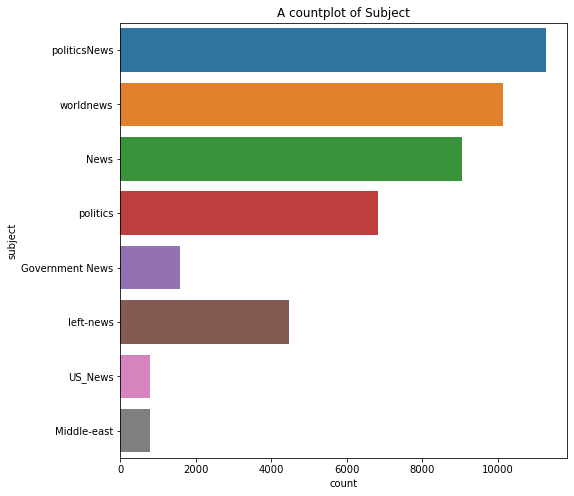

In [27]:
plt.figure(figsize=(8,8))
sns.countplot(y='subject', data= new_df)
plt.title('A countplot of Subject')


#### Countplot for the `isfake` column

Text(0.5, 1.0, 'A countplot of Fake/true')

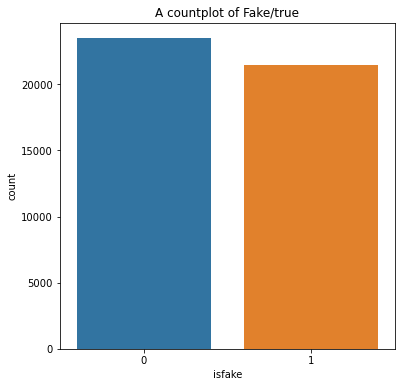

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x='isfake', data= new_df)
plt.title('A countplot of Fake/true')


## List of words 

In [29]:
word_list=[]
for i in new_df.clean_news:
    for j in i:
        word_list.append(j)

word_list

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [30]:
total_no_words= len(list(set(word_list)))
total_no_words

108704

## Split and Train 

In [31]:
#  we split the dataset with target and features 
target=new_df.isfake
features=new_df.joint

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2)

*The tokenize module provides a lexical scanner for Python source code, implemented in Python. The scanner in this module returns comments as tokens as well, making it useful for implementing “pretty-printers”, including colorizers for on-screen displays*

In [33]:
tok = Tokenizer(num_words=total_no_words)
tok.fit_on_texts(xtrain)
tr_seq = tok.texts_to_sequences(xtrain)
test_seq = tok.texts_to_sequences(xtest)


Once we use the tokenizer, we see that the tockenizer covnerted them into tokens/ numerical format

In [34]:
print('The encoding of: \n',new_df.joint[0],'looks like this:\n\n',  tr_seq[0])

The encoding of: 
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need

We also create a padded sequence with maxlen=40


In [35]:
tr_pad = pad_sequences(tr_seq, maxlen=40, padding='post', truncating='post')
test_pad = pad_sequences(test_seq, maxlen=40, truncating='post')

Padded Training encoding looks like this

In [36]:
for i, doc in enumerate(tr_pad[:2]):
    print('The padded encoding of ',i+1,'is', doc)

The padded encoding of  1 is [ 6196  9344  1837    51   220  3263   643   351    55   298   218  4118
  1069   992   181   120  1279   717   185     2    55  4036   992   584
   601  9209   627    31   220  9344  1837 38461   400    25   118   220
  9344  1837   320   999]
The padded encoding of  2 is [ 3673  2374   679  1489  1542  2240   226 19656    65  1031   303   976
    23   107  3673  2374   679  1489  2240  1542   226   499    65  2990
   202 65547  1028  4942    67   236  2374    19     2  1031   145 18739
  1922   355  4208   416]


## Building and training the model

In [37]:
tf.config.experimental.enable_mlir_bridge()

In [38]:
pip install tensorflow-io --user

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: idna<3,>=2.5 in c:\users\kumar\anaconda3\lib\site-packages (from requests<3,>=2.21.0->tensorboard~=2.6->tensorflow<2.8.0,>=2.7.0->tensorflow-io) (2.10)



In [39]:
import tensorflow_io as tfio
tfio.__version__

'0.22.0'

In [40]:
# # defining the model as sequential
seq_mod=Sequential()

# # embedding layer
seq_mod.add(Embedding(total_no_words, output_dim=128))

seq_mod.add(Bidirectional(LSTM(128)))


# # RNN and LTSM Bi-directional 
seq_mod.add(Dense(128, activation='relu'))
seq_mod.add(Dense(1, activation='sigmoid'))
seq_mod.compile(optimizer='adam',loss='binary_crossentropy', metrics='accuracy')


# # summary 
seq_mod.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         13914112  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,210,305
Trainable params: 14,210,305
Non-trainable params: 0
_________________________________________________________________


### Converting target train data into 

In [41]:
ytrain = np.asarray(ytrain)

In [42]:
#  fit the modle 
seq_mod.fit(tr_pad, ytrain, batch_size=64, validation_split=0.1, epochs=2)

Epoch 1/2
506/506 [==============================] - 208s 401ms/step - loss: 0.0407 - accuracy: 0.9846 - val_loss: 0.0083 - val_accuracy: 0.9981
Epoch 2/2
506/506 [==============================] - 211s 417ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0053 - val_accuracy: 0.9983


## PERFORMANCE OF THE TRAINED MODEL 

In [43]:
predicted_value = seq_mod.predict(test_pad)

In [44]:
pred=[]
for i in range(len(predicted_value)):
    if predicted_value[i].item() > 0.5: 
        pred.append(1)
    else:
        pred.append(0)
    

In [45]:
#  accuracy of the model
from sklearn.metrics import accuracy_score

# acc = accuracy_score(list(ytest),pred)
acc = seq_mod.evaluate(xtest,ytest)
print('Model accuracy: ',acc[1])


UnimplementedError:  Cast string to float is not supported
	 [[node sequential/Cast
 (defined at C:\Users\kumar\anaconda3\lib\site-packages\keras\engine\functional.py:671)
]] [Op:__inference_test_function_14187]

Errors may have originated from an input operation.
Input Source operations connected to node sequential/Cast:
In[0] IteratorGetNext (defined at C:\Users\kumar\anaconda3\lib\site-packages\keras\engine\training.py:1355)

Operation defined at: (most recent call last)
>>>   File "C:\Users\kumar\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\asyncio\events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
>>>     lambda f: self._run_callback(functools.partial(callback, future))
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
>>>     ret = callback()
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
>>>     self.run()
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
>>>     yielded = self.gen.send(value)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 381, in dispatch_queue
>>>     yield self.process_one()
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\tornado\gen.py", line 225, in wrapper
>>>     runner = Runner(result, future, yielded)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\tornado\gen.py", line 714, in __init__
>>>     self.run()
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
>>>     yielded = self.gen.send(value)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
>>>     yield gen.maybe_future(dispatch(*args))
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
>>>     yielded = next(result)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
>>>     yield gen.maybe_future(handler(stream, idents, msg))
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
>>>     yielded = next(result)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
>>>     self.do_execute(
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
>>>     yielded = next(result)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2877, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2923, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3146, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "<ipython-input-45-2bfead613e15>", line 5, in <module>
>>>     acc = seq_mod.evaluate(xtest,ytest)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\keras\engine\training.py", line 1537, in evaluate
>>>     tmp_logs = self.test_function(iterator)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\keras\engine\training.py", line 1366, in test_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\keras\engine\training.py", line 1356, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\keras\engine\training.py", line 1349, in run_step
>>>     outputs = model.test_step(data)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\keras\engine\training.py", line 1303, in test_step
>>>     y_pred = self(x, training=False)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\keras\engine\sequential.py", line 373, in call
>>>     return super(Sequential, self).call(inputs, training=training, mask=mask)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\keras\engine\functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\keras\engine\functional.py", line 571, in _run_internal_graph
>>>     y = self._conform_to_reference_input(y, ref_input=x)
>>> 
>>>   File "C:\Users\kumar\anaconda3\lib\site-packages\keras\engine\functional.py", line 671, in _conform_to_reference_input
>>>     tensor = tf.cast(tensor, dtype=ref_input.dtype)
>>> 

### Confusion MAtrix

In [ ]:
conf_matrix = confusion_matrix(ytest, predicted_value)
plt.figure(figsize = (5, 5))
sns.heatmap(conf_matrix, annot = True, cbar = True)

### Classification report

In [ ]:
print(classification_report(ytest, predicted_value))